In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [5]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full),(X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

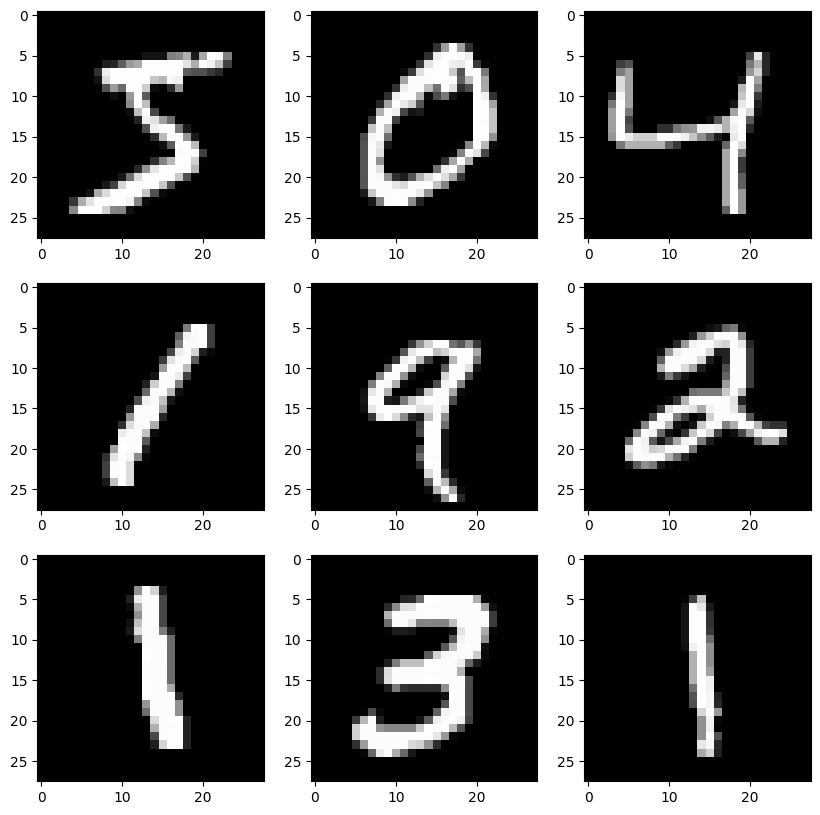

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))
a = 0

for i in range(3):
    for j in range(3):
        axes[i, j].imshow(X_train_full[a], cmap=plt.get_cmap('gray'))
        a = a + 1

plt.show()

In [11]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255


In [12]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [14]:
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [15]:
class_names[y_train[8]]

'9'

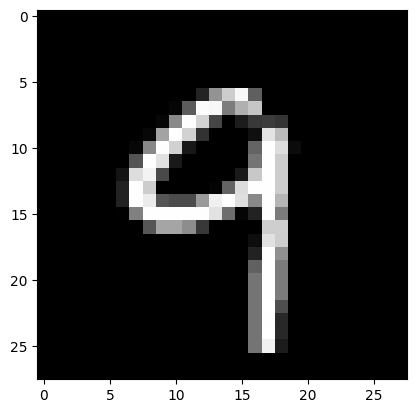

In [16]:
plt.imshow(X_train[8], cmap=plt.get_cmap('gray'))

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(110, activation = "softmax"))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               235500    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 110)               11110     
                                                                 
Total params: 276,710
Trainable params: 276,710
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.layers

In [21]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [22]:
X_train.shape

(55000, 28, 28)

In [23]:
history = model.fit(X_train,
                    y_train,
                    epochs = 30,
                    validation_data = (X_valid, y_valid),
                    batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7643 - accuracy: 0.8199 - val_loss: 0.3360 - val_accuracy: 0.9072
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3136 - accuracy: 0.9098 - val_loss: 0.2620 - val_accuracy: 0.9256
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2606 - accuracy: 0.9257 - val_loss: 0.2309 - val_accuracy: 0.9356
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2244 - accuracy: 0.9358 - val_loss: 0.1960 - val_accuracy: 0.9464
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1975 - accuracy: 0.9440 - val_loss: 0.1786 - val_accuracy: 0.9498
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1753 - accuracy: 0.9497 - val_loss: 0.1638 - val_accuracy: 0.9540
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1573 - accuracy: 0.9548 - val_loss: 0.1483 - val_accuracy:

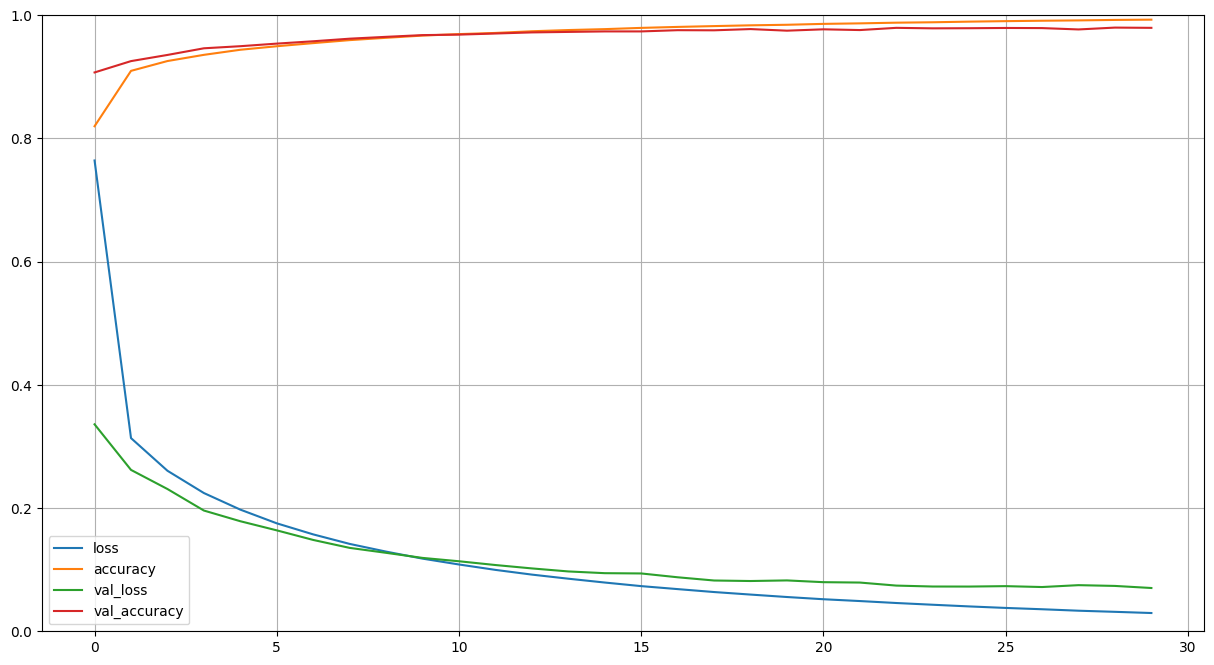

In [25]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0726 - accuracy: 0.9785


[0.07257238775491714, 0.9785000085830688]

In [27]:
model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


array([[5.6523885e-07, 6.5497204e-08, 3.8971495e-05, ..., 2.6337610e-09,
        6.5717702e-11, 5.2583071e-10],
       [1.3753547e-06, 1.5322499e-04, 9.9902058e-01, ..., 1.4970754e-11,
        1.6479047e-11, 3.5265861e-12],
       [3.9052020e-06, 9.9715656e-01, 2.2902938e-04, ..., 5.8235605e-07,
        5.1123345e-07, 4.5328161e-07],
       ...,
       [2.9483874e-10, 3.8727424e-11, 4.4937967e-11, ..., 3.7042248e-11,
        3.0928089e-13, 9.6085672e-13],
       [4.2848480e-09, 1.6902034e-08, 8.8608626e-12, ..., 2.4175371e-12,
        2.0796394e-12, 2.5768130e-13],
       [2.3408172e-06, 1.5037038e-10, 4.5494116e-07, ..., 3.7222433e-13,
        2.0300115e-13, 1.0176028e-13]], dtype=float32)

In [28]:
y_prob = model.predict(X_test)
y_classes = y_prob.argmax(axis=-1)
y_classes

313/313 [==============================] - 0s 1ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [29]:
confusion_matrix = tf.math.confusion_matrix(y_test, y_classes)

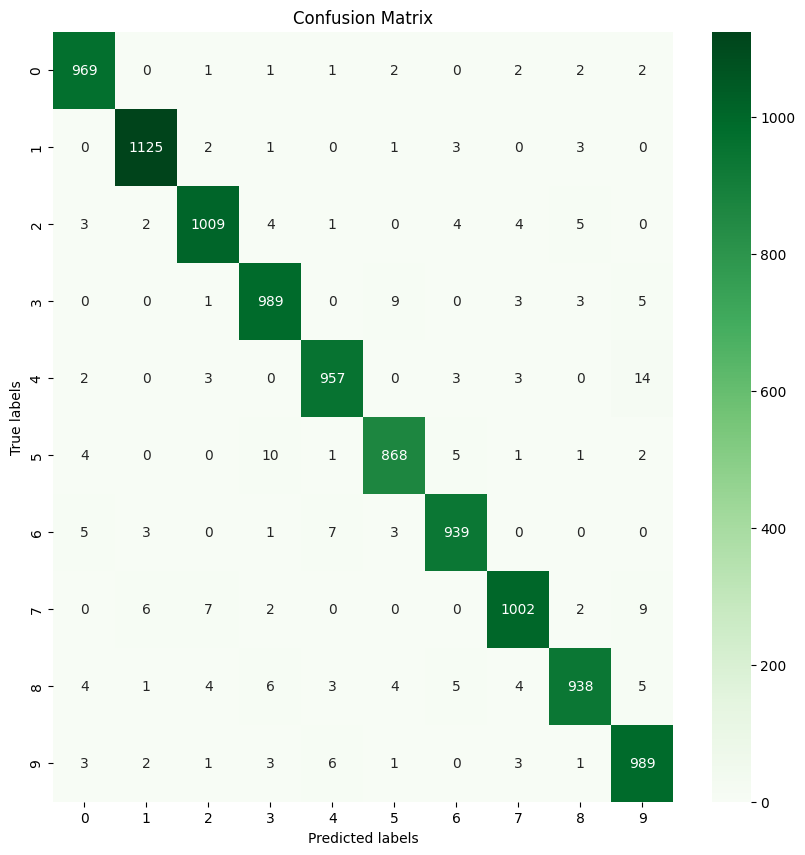

In [31]:
import seaborn as sb

fig = sb.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Greens')

fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix')
fig.xaxis.set_ticklabels(class_names)
fig.yaxis.set_ticklabels(class_names)
fig.figure.set_size_inches(10, 10)

plt.show()